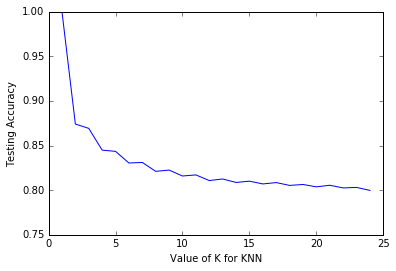

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


df1 = pd.read_csv('Train1.csv', header = None)
df2 = pd.read_csv('Test.csv', header = None)

# Clean the Data
df1.dropna()
df2.dropna()

codeData1 = preprocessing.LabelEncoder()
for i in range(len(df1.columns)):  
	p1=codeData1.fit_transform(df1[i])
	df1[i]=p1
	
codeData2 = preprocessing.LabelEncoder()
for i in range(len(df2.columns)):  
	p2=codeData2.fit_transform(df2[i])
	df2[i]=p2
	
X_train = df1
Y_train = df1[len(df1.columns)-1]
del X_train[len(X_train.columns)-1]

X_test = df2
Y_test = df2[len(df2.columns)-1]
del X_test[len(X_test.columns)-1]

# plot to show the Training Accuracy - A scenario of over fitting
rangek = range(1,25)
accuracyvalues1 = []
for k in rangek:
    kmodel = KNeighborsClassifier(n_neighbors=k)
    kmodel.fit(X_train, Y_train)
    y_pred = kmodel.predict(X_train)
    accuracyvalues1.append(metrics.accuracy_score(Y_train, y_pred))

plt.plot(rangek, accuracyvalues1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

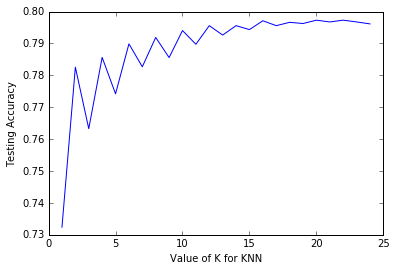

In [8]:
# plot to show the Testing Accuracy 
rangek = range(1,25)
accuracyvalues2 = []
for k in rangek:
    kmodel = KNeighborsClassifier(n_neighbors=k)
    kmodel.fit(X_train, Y_train)
    y_pred = kmodel.predict(X_test)
    accuracyvalues2.append(metrics.accuracy_score(Y_test, y_pred))

plt.plot(rangek, accuracyvalues2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

CONFUSION MATRIX
[[12226   209]
 [ 3091   755]]


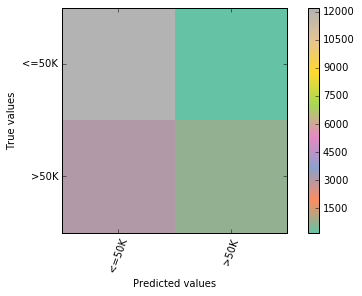

In [9]:
#RESULTS

#Mention the labels to appear in confusion matrix plot
labels=["<=50K",">50K"]

#Generate y_pred for best value of K
kmodel = KNeighborsClassifier(n_neighbors=20)
kmodel.fit(X_train, Y_train)
y_pred = kmodel.predict(X_test)


#COUNT AND PRODUCE A CONFUSION MATRIX(Use confusion_matrix())
cm = confusion_matrix(Y_test,y_pred)
print "CONFUSION MATRIX"
print cm
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap="Set2")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=70)
plt.yticks(tick_marks, labels)
plt.tight_layout()
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()